In [10]:
import xygame as xg
import time as tm
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
import imageio
import os
import re




def find_last_file_with_integer(directory):
    # Check if the directory exists
    if not os.path.exists(directory):
        print("Directory does not exist.")
        return None

    # List all files in the directory
    files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]

    # Sort the files lexicographically to find the "last" file
    files.sort()

    # Grab the last file in the sorted list
    last_file = files[-1] if files else None

    if last_file:
        # print(f"Last file found: {last_file}")
        
        # Find the integer in the file name using regex
        match = re.search(r'\d+', last_file)
        if match:
            integer_in_name = int(match.group())
            # print(f"Integer found in the file name: {integer_in_name}")
            return integer_in_name
        else:
            # print("No integer found in the file name.")
            return None
    else:
        # print("No files found in the directory.")
        return None
    

In [11]:
start_time = tm.time()

rows = 20
cols = 20
beta = 1
J = 1
time = 1

In [12]:
b_field = xg.field_generator(rows,cols, left_most=0, right_most=0)
lattice = xg.field_generator(rows,cols, left_most=0, right_most=0)
for i in range(rows):
    for j in range(cols):
        lattice[i,j] = np.arctan2((i - 10.5),(j - 5.5)) - np.arctan2((i - 10.5),(j - 14.5))

model = xg.full_model(lattice=lattice, B_field=b_field, beta=beta, time=time, J=J)

In [13]:
# time = 30000000
# for i in range(time):
#     xg.metropolis(model)

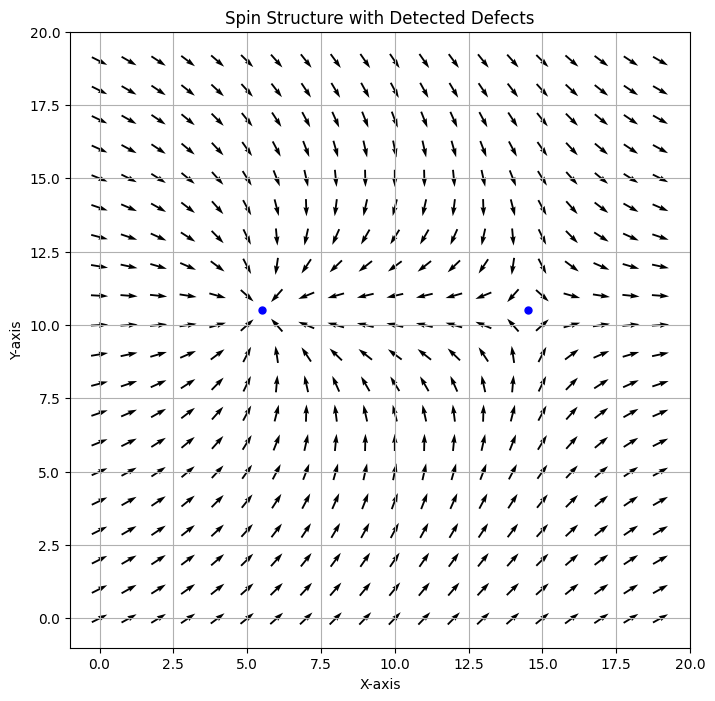

In [14]:
time = 100
# for i in range(time):
#     xg.metropolis(model)

# first way
defects = xg.detect_defects(lattice)

# Plot the spin structure and the detected defects
X, Y = np.meshgrid(np.arange(cols), np.arange(rows))
U = np.cos(lattice)
V = np.sin(lattice)

plt.figure(figsize=(8, 8))
plt.quiver(X, Y, U, V, pivot='mid')
for (x, y) in defects:
    plt.plot(x, y, 'ro' if x % 2 == 0 else 'bo', markersize=5)  # red for vortices, blue for antivortices with small marker
plt.xlim(-1, cols)
plt.ylim(-1, rows)
plt.title('Spin Structure with Detected Defects')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid()
plt.show()

In [15]:
frame_dir = "frames"
os.makedirs(frame_dir, exist_ok=True)

In [26]:
lattice = model.lattice
total_time = time
plot_interval = 1
all_ready_frame =  find_last_file_with_integer("/workspaces/Vinalslab/xy_model/frames")
if all_ready_frame == None:
    all_ready_frame = 0
else: 
    all_ready_frame += 1











# # Function to visualize the lattice at a given iteration step
# def _show(frame):
#     X, Y = np.meshgrid(np.arange(cols), np.arange(rows))
    
#     # Reset lattice to its initial state before running the iterations
#     lattice = model.lattice.copy()
    
#     # Calculate the actual iteration count based on the frame number
#     iteration = frame * plot_interval
    
#     # Run Metropolis algorithm up to the calculated iteration
#     for _ in range(iteration):
#         xg.metropolis(model)
    
#     # Detect defects and calculate spin structure
#     defects = xg.detect_defects(lattice)
#     U = np.cos(lattice)
#     V = np.sin(lattice)

#     # Plot the spin structure and detected defects
#     plt.figure(figsize=(8, 8))
#     plt.quiver(X, Y, U, V, pivot='mid')

#     # Mark defects
#     for (x, y) in defects:
#         plt.plot(x, y, 'ro' if x % 2 == 0 else 'bo', markersize=5)

#     plt.xlim(-1, cols)
#     plt.ylim(-1, rows)
#     plt.title(f'Spin Structure with Detected Defects at Iteration {iteration}')
#     plt.xlabel('X-axis')
#     plt.ylabel('Y-axis')
#     plt.grid()
#     plt.show()

# Calculate the number of frames based on the total time and plot interval
max_frames = total_time // plot_interval



# Create a directory to save frames
def save_frame(frame):
    X, Y = np.meshgrid(np.arange(cols), np.arange(rows))
    
    lattice = model.lattice.copy()
    
    iteration = frame * plot_interval
    
    for _ in range(iteration):
        xg.metropolis(model)
    
    defects = xg.detect_defects(lattice)
    U = np.cos(lattice)
    V = np.sin(lattice)

    plt.figure(figsize=(8, 8))
    plt.quiver(X, Y, U, V, pivot='mid')

    for (x, y) in defects:
        plt.plot(x, y, 'ro' if x % 2 == 0 else 'bo', markersize=5)

    plt.xlim(-1, cols)
    plt.ylim(-1, rows)
    plt.title(f'Spin Structure with Detected Defects at Iteration {iteration}')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.grid()
    
    # Save the frame as an image
    plt.savefig(f"{frame_dir}/frame_{(frame + all_ready_frame):04d}.png")
    plt.close()

# Save all frames
for frame in range(max_frames + 1):
    save_frame(frame)



















# Use interact to create a slider for the number of frames (each representing plot_interval steps)
# interact(_show, frame=widgets.IntSlider(min=0, max=max_frames, step=1, value=0))

In [28]:
def export_mp4(image_folder_name, output_file_name, frame_rate=24):
    # Get the list of image files
    images = [img for img in os.listdir(image_folder_name) if img.endswith(".png")]
    images.sort()  # Ensure images are in order

    # Create a list to store image paths
    image_paths = [os.path.join(image_folder_name, img) for img in images]

    # Read images and create the video using imageio
    with imageio.get_writer(output_file_name, fps=frame_rate) as writer:
        for image_path in image_paths:
            writer.append_data(imageio.imread(image_path))
    return True

# Export the video
output_file_name = "spin_structure_simulation.mp4"
export_mp4(frame_dir, output_file_name)

/tmp/ipykernel_36462/1888210773.py:12: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  writer.append_data(imageio.imread(image_path))


True